<a href="https://colab.research.google.com/github/jyotidabass/marked-unmarked-tooth-tongue-classification/blob/main/Classification_toothmarked_unmarked_tongue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
base_dir = '/content/drive/MyDrive/archive (6)'
train_directory = '/content/drive/MyDrive/archive (6)'
test_directory = '/content/drive/MyDrive/archive (6)'
validation_directory = '/content/drive/MyDrive/archive (6)'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(train_directory,
                                              target_size = (150,150),
                                              batch_size = 20,
                                              class_mode = 'binary')

validation_generator = datagen.flow_from_directory(validation_directory,
                                              target_size = (150,150),
                                              batch_size = 20,
                                              class_mode = 'binary')

Found 1250 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
#First convolutional layer with 32 3x3 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu',
      input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#Second convolutional layer with 64 3x3 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Third convolutional layer with 128 3x3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Fourth convolutional layer with 128 3x3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Fifth convolutional layer with 128 3x3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#We flatten our final feature map and add a hidden dense layer with 512 neurons
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

#Our output layer
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers

In [ ]:
from tensorflow import keras
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [ ]:
result = model.fit(
train_generator,
steps_per_epoch=10,
epochs=4,
validation_data=validation_generator,
validation_steps=5)

Epoch 1/4
10/10 [==============================] - 109s 11s/step - loss: 0.6933 - acc: 0.5700 - val_loss: 0.6807 - val_acc: 0.6000
Epoch 2/4
10/10 [==============================] - 73s 8s/step - loss: 0.6894 - acc: 0.5600 - val_loss: 0.7059 - val_acc: 0.4900
Epoch 3/4
10/10 [==============================] - 21s 1s/step - loss: 0.6879 - acc: 0.5600 - val_loss: 0.6869 - val_acc: 0.5700
Epoch 4/4
10/10 [==============================] - 13s 1s/step - loss: 0.6870 - acc: 0.5750 - val_loss: 0.6941 - val_acc: 0.5000


In [ ]:
import matplotlib.pyplot as plt

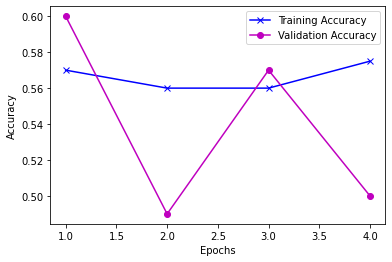

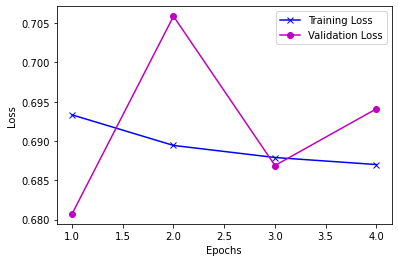

In [ ]:
acc = result.history['acc']
loss = result.history['loss']
validation_acc = result.history['val_acc']
validation_loss = result.history['val_loss']

x = range(1,len(acc)+1)

plt.plot(x,acc,'x-b',label = 'Training Accuracy')
plt.plot(x,validation_acc,'o-m',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(x,loss,'x-b',label = 'Training Loss')
plt.plot(x,validation_loss,'o-m',label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')

In [ ]:
train_generator_with_aug = train_datagen.flow_from_directory(train_directory,
                                                    batch_size = 20,
                                                    target_size = (150,150),
                                                    class_mode = 'binary')

validation_generator = datagen.flow_from_directory(validation_directory,
                                                   batch_size = 20,
                                                   target_size = (150,150),
                                                   class_mode = 'binary')

result_aug = model.fit(train_generator_with_aug,
                       steps_per_epoch = 10,
                       epochs =4,
                       validation_data = validation_generator,
                       validation_steps = 5)

Found 1250 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.
Epoch 1/4
10/10 [==============================] - 15s 1s/step - loss: 0.6959 - acc: 0.5250 - val_loss: 0.6895 - val_acc: 0.5700
Epoch 2/4
10/10 [==============================] - 19s 2s/step - loss: 0.6721 - acc: 0.6400 - val_loss: 0.7048 - val_acc: 0.5500
Epoch 3/4
10/10 [==============================] - 17s 2s/step - loss: 0.6887 - acc: 0.5850 - val_loss: 0.6735 - val_acc: 0.6100
Epoch 4/4
10/10 [==============================] - 15s 1s/step - loss: 0.6766 - acc: 0.6150 - val_loss: 0.6633 - val_acc: 0.6300


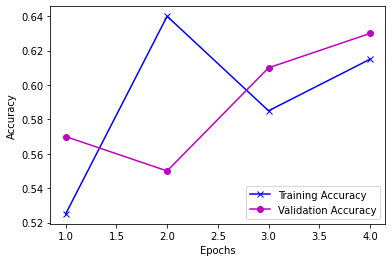

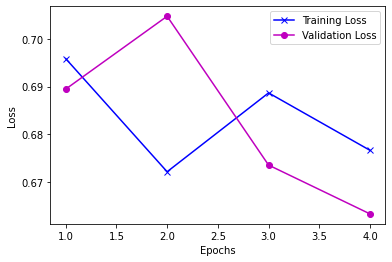

In [ ]:
acc = result_aug.history['acc']
loss = result_aug.history['loss']
validation_acc = result_aug.history['val_acc']
validation_loss = result_aug.history['val_loss']

x = range(1,len(acc)+1)

plt.plot(x,acc,'x-b',label = 'Training Accuracy')
plt.plot(x,validation_acc,'o-m',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(x,loss,'x-b',label = 'Training Loss')
plt.plot(x,validation_loss,'o-m',label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#from tensorflow.keras.applications.vgg16 import VGG
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16_base = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#Freezing the convoutional base
vgg16_base.trainable = False

In [ ]:
new_model = models.Sequential()
new_model.add(vgg16_base)
new_model.add(layers.Flatten())
new_model.add(layers.Dense(256,activation = 'relu'))
new_model.add(layers.Dense(1,activation = 'sigmoid'))

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
new_model.compile(optimizer = keras.optimizers.RMSprop( learning_rate= 2e-5),
                  loss = 'binary_crossentropy',
                  metrics = 'acc')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')

train_generator_vgg16 = train_datagen.flow_from_directory(train_directory, 
                                                          target_size = (150,150),
                                                          batch_size = 20,
                                                          class_mode = 'binary')

validation_generator = datagen.flow_from_directory(validation_directory,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

Found 1250 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.


In [ ]:
result_vgg16 = new_model.fit(train_generator_vgg16,
                       steps_per_epoch = 10,
                       epochs =4,
                       validation_data = validation_generator,
                       validation_steps = 5)

Epoch 1/4
10/10 [==============================] - 69s 7s/step - loss: 0.6993 - acc: 0.5450 - val_loss: 0.7190 - val_acc: 0.4400
Epoch 2/4
10/10 [==============================] - 68s 7s/step - loss: 0.6765 - acc: 0.5900 - val_loss: 0.6857 - val_acc: 0.5100
Epoch 3/4
10/10 [==============================] - 67s 7s/step - loss: 0.6701 - acc: 0.5900 - val_loss: 0.6830 - val_acc: 0.5300
Epoch 4/4
10/10 [==============================] - 69s 7s/step - loss: 0.6580 - acc: 0.6350 - val_loss: 0.6760 - val_acc: 0.5400


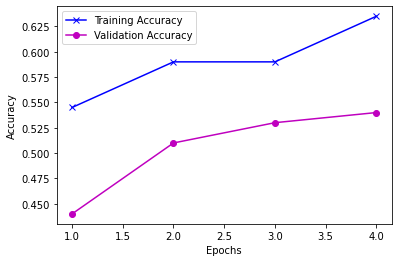

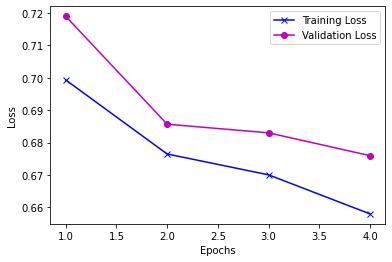

In [ ]:
acc = result_vgg16.history['acc']
loss = result_vgg16.history['loss']
validation_acc = result_vgg16.history['val_acc']
validation_loss = result_vgg16.history['val_loss']

x = range(1,len(acc)+1)

plt.plot(x,acc,'x-b',label = 'Training Accuracy')
plt.plot(x,validation_acc,'o-m',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(x,loss,'x-b',label = 'Training Loss')
plt.plot(x,validation_loss,'o-m',label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
vgg16_base.trainable = True
for layer in vgg16_base.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False

In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
new_model.compile(loss='binary_crossentropy',
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics='acc')

In [ ]:
result_fine_tune = new_model.fit(train_generator_vgg16,
                                 steps_per_epoch = 10,
                                 epochs = 4,
                                 validation_data = validation_generator,
                                 validation_steps = 5)

Epoch 1/4
10/10 [==============================] - 81s 8s/step - loss: 0.6604 - acc: 0.6100 - val_loss: 0.6824 - val_acc: 0.5300
Epoch 2/4
10/10 [==============================] - 87s 9s/step - loss: 0.6441 - acc: 0.6550 - val_loss: 0.5980 - val_acc: 0.7000
Epoch 3/4
10/10 [==============================] - 78s 8s/step - loss: 0.6440 - acc: 0.6050 - val_loss: 0.6076 - val_acc: 0.6600
Epoch 4/4
10/10 [==============================] - 78s 8s/step - loss: 0.6135 - acc: 0.7150 - val_loss: 0.6206 - val_acc: 0.6100


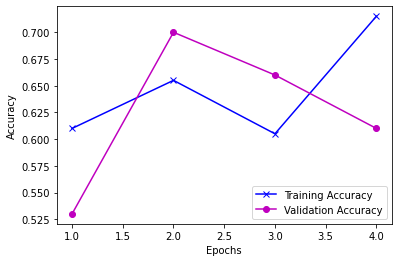

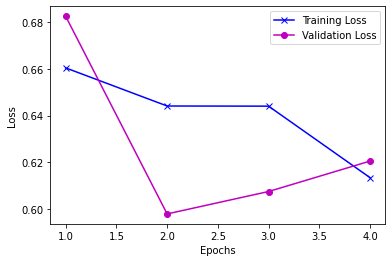

In [ ]:
acc = result_fine_tune.history['acc']
loss = result_fine_tune.history['loss']
validation_acc = result_fine_tune.history['val_acc']
validation_loss = result_fine_tune.history['val_loss']

x = range(1,len(acc)+1)

plt.plot(x,acc,'x-b',label = 'Training Accuracy')
plt.plot(x,validation_acc,'o-m',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(x,loss,'x-b',label = 'Training Loss')
plt.plot(x,validation_loss,'o-m',label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_generator = datagen.flow_from_directory(
test_directory,
target_size=(150, 150),
batch_size = 25,
class_mode='binary')

Found 1250 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = new_model.evaluate(test_generator, steps=4)
print('test accuracy: ' + str(test_accuracy*100) + '%')

4/4 [==============================] - 22s 5s/step - loss: 0.6140 - acc: 0.6000
test accuracy: 60.00000238418579%


In [ ]:
import os
if os.getcwd() != '/content':
  os.chdir('/content')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  probability = new_model.predict(images, batch_size=10)
  if probability > 0.5:
    print('Image is of a tooth marked tongue')
  elif probability < 0.5:
    print('Image is of a tooth unmarked tongue .')
  else:
    print('Image is ambiguous. ')
  os.remove(path)

Saving 140826073513_st.png to 140826073513_st.png
Image is of a tooth unmarked tongue .
